## Algorithms for Massive Data Project - Project 4: Face/comic recognizer
### Andrea Pio Cutrera - 965591 - Data Science and Economics
## Part 2 - Data Preprocessing

Project for the module _Algoritms for Massive Data_ of the course _Algoritms for Massive Data, Cloud and Distributed Computing_ for the academic year 2021-2022.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

# We use a Python Library called OpenCV: https://docs.opencv.org/4.x/d1/dfb/intro.html
# OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes 
# several hundreds of computer vision algorithms for image operations.
# pip install opencv-python
import cv2

!ls

archive                             face2comics_v2.0.0_by_Sxela
comic-faces-paired-synthetic-v2.zip project-2.ipynb
deep-learning-tutorial.ipynb        project.ipynb
download_data.ipynb                 samples


In [2]:
print(datetime.datetime.now())

2022-03-09 21:21:37.202767


In [3]:
# get present working directory
working_directory = !pwd
working_directory = working_directory[0]
working_directory

'/Users/andreacutrera/Desktop/Andrea_Pio_Cutrera_project_amd'

In [4]:
DIR = working_directory + "/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela"
CATEGORIES = ["comics", "faces"]

In [5]:
path_faces = os.path.join(DIR, CATEGORIES[1])
path_comics = os.path.join(DIR, CATEGORIES[0])

# just to show the path to the 2 folders in which we have the images
print(path_faces[-62:])
print(path_comics[-63:])

/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces
/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics


In [6]:
# just show the first 5 images in the folder of real faces
os.listdir(path_faces)[:5]

['9733.jpg', '63.jpg', '6400.jpg', '823.jpg', '4217.jpg']

In [7]:
# just show the first 5 images in the folder of comics faces
os.listdir(path_comics)[:5]

['9733.jpg', '63.jpg', '6400.jpg', '823.jpg', '4217.jpg']

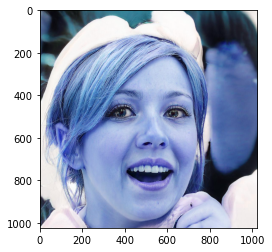

In [8]:
# Just show one image of a real face - the 100-th one in the folder
image_array = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[100]))
plt.imshow(image_array)
plt.show()

Text(0.5, 1.0, '8-th')

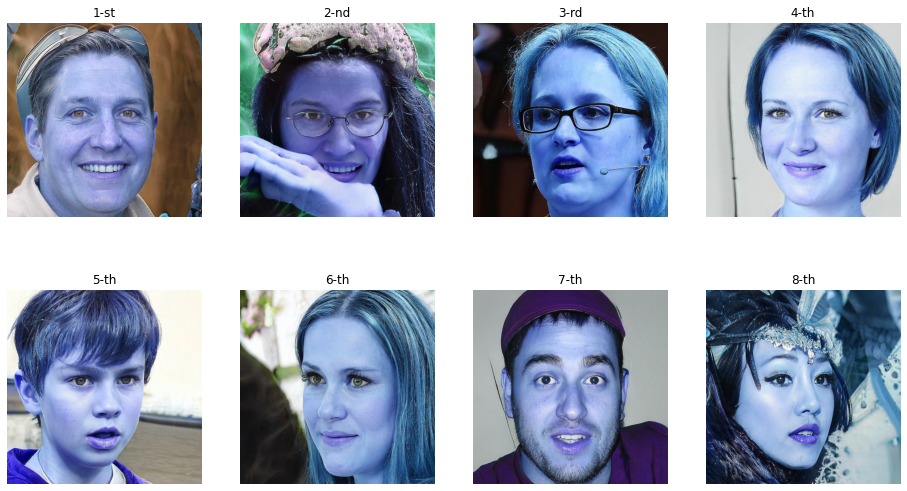

In [9]:
# If we want to diplay more than on image together, to have a broader idea of how our images are made

# create figure
fig = plt.figure(figsize=(16, 9))

# setting values to rows and column variables
rows = 2
columns = 4

# reading images
Image1 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[1]))
Image2 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[2]))
Image3 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[3]))
Image4 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[4]))
Image5 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[5]))
Image6 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[6]))
Image7 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[7]))
Image8 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[8]))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("1-st")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("2-nd")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("3-rd")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("4-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("5-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("6-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 7)

# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("7-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 8)

# showing image
plt.imshow(Image8)
plt.axis('off')
plt.title("8-th")

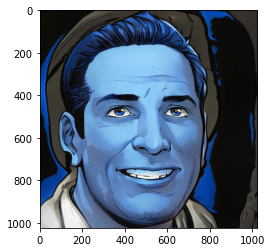

In [10]:
# Just show one image of a comics' face - the 1-st one in the folder
image_array = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]))
plt.imshow(image_array)
plt.show()

Text(0.5, 1.0, '8-th')

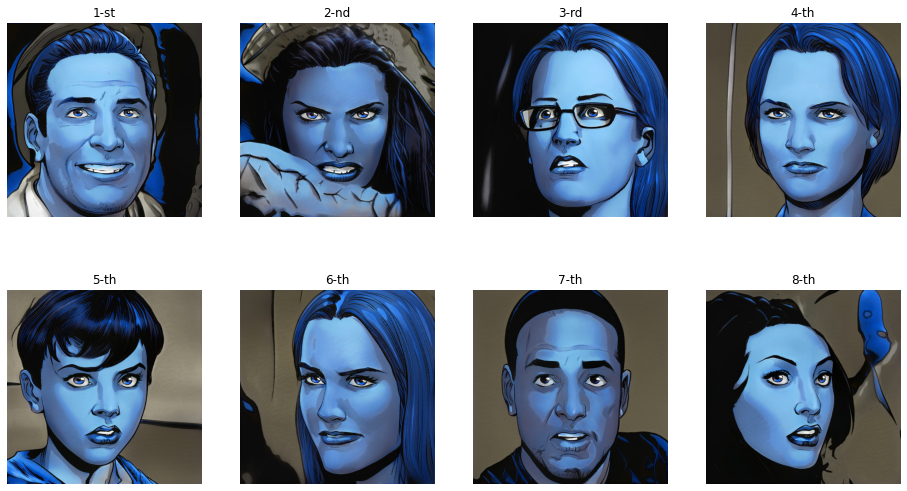

In [11]:
# The same for the comics

# create figure
fig = plt.figure(figsize=(16, 9))

# setting values to rows and column variables
rows = 2
columns = 4

# reading images
Image1 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]))
Image2 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[2]))
Image3 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[3]))
Image4 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[4]))
Image5 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[5]))
Image6 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[6]))
Image7 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[7]))
Image8 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[8]))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("1-st")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("2-nd")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("3-rd")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("4-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("5-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("6-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 7)

# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("7-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 8)

# showing image
plt.imshow(Image8)
plt.axis('off')
plt.title("8-th")

In [12]:
image_array

array([[[ 33,  44,  64],
        [ 18,  29,  49],
        [  6,  15,  35],
        ...,
        [ 51,  46,  45],
        [ 60,  55,  54],
        [ 78,  73,  72]],

       [[  5,  16,  36],
        [  0,   9,  29],
        [  0,   4,  24],
        ...,
        [ 40,  35,  34],
        [ 44,  39,  38],
        [ 57,  52,  51]],

       [[  0,   2,  22],
        [  0,   2,  22],
        [  0,   5,  23],
        ...,
        [ 46,  41,  40],
        [ 50,  45,  44],
        [ 60,  55,  54]],

       ...,

       [[196, 202, 209],
        [205, 211, 216],
        [212, 217, 220],
        ...,
        [ 54,  53,  57],
        [ 65,  63,  69],
        [ 77,  75,  81]],

       [[186, 193, 202],
        [198, 204, 211],
        [208, 212, 217],
        ...,
        [ 57,  56,  60],
        [ 71,  69,  75],
        [ 86,  84,  90]],

       [[179, 186, 195],
        [190, 198, 205],
        [204, 207, 215],
        ...,
        [ 67,  66,  70],
        [ 83,  81,  87],
        [ 99,  97, 103]]

Images shapes are ```1024x1024 pixels```

- the third dimension with 3 values represent the color BRG: Blue, Red and Green;

In [13]:
image_array.shape

(1024, 1024, 3)

In [14]:
# Just encode the image in Grayscale with the function of CV2
cv2.IMREAD_GRAYSCALE

0

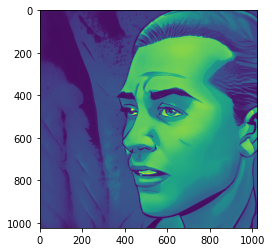

In [15]:
# Now try to see an image in black/white
image_array = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[10]), cv2.IMREAD_GRAYSCALE)
plt.imshow(image_array)
plt.show()

Text(0.5, 1.0, '8-th')

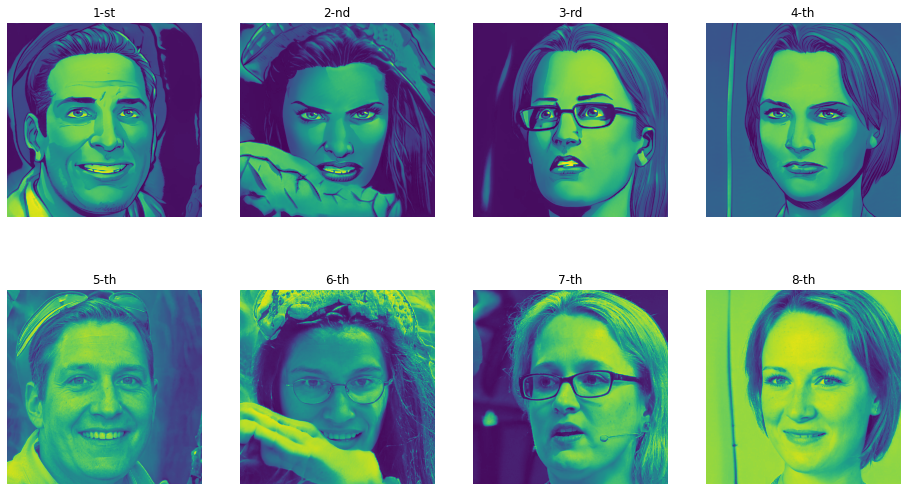

In [16]:
# Now let's see together some comics and some real faces once the new encoding in Greyscale 
# (lower dimensional data without BRG)

# create figure
fig = plt.figure(figsize=(16, 9))

# setting values to rows and column variables
rows = 2
columns = 4

# reading images
Image1 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE)
Image2 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[2]), cv2.IMREAD_GRAYSCALE)
Image3 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[3]), cv2.IMREAD_GRAYSCALE)
Image4 = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[4]), cv2.IMREAD_GRAYSCALE)
Image5 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[1]), cv2.IMREAD_GRAYSCALE)
Image6 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[2]), cv2.IMREAD_GRAYSCALE)
Image7 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[3]), cv2.IMREAD_GRAYSCALE)
Image8 = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[4]), cv2.IMREAD_GRAYSCALE)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("1-st")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("2-nd")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("3-rd")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("4-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("5-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("6-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 7)

# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("7-th")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 8)

# showing image
plt.imshow(Image8)
plt.axis('off')
plt.title("8-th")

In [17]:
# now data has a different dimensionality --> just 1024x1024 pixels
image_array, image_array.shape

(array([[ 86,  62,  36, ...,  70,  75,  79],
        [ 42,  25,  10, ...,  61,  67,  71],
        [ 17,   9,   4, ...,  60,  65,  70],
        ...,
        [ 22,  16,  16, ...,  64,  74,  86],
        [ 39,  20,  13, ...,  68,  82,  97],
        [ 72,  42,  27, ...,  79,  97, 114]], dtype=uint8),
 (1024, 1024))

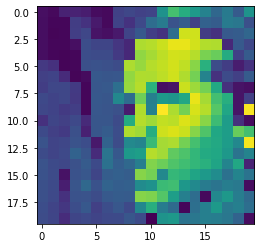

In [18]:
image_size = 20

image_resized = cv2.resize(image_array, (image_size, image_size))
plt.imshow(image_resized)
plt.show()

Text(0.5, 1.0, '2048x2028')

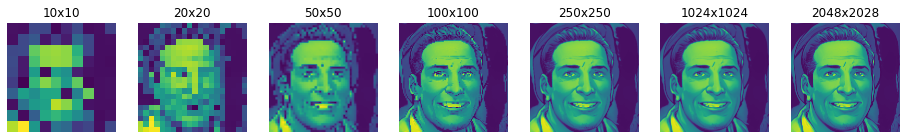

In [19]:
# Now let's see together how the size of our images can be altered

# create figure
fig = plt.figure(figsize=(16, 9))

# setting values to rows and column variables
rows = 1
columns = 7

# reading images
Image1 = cv2.resize(cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE), (10,10))
Image2 = cv2.resize(cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE), (20,20))
Image3 = cv2.resize(cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE), (50,50))
Image4 = cv2.resize(cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE), (100,100))
Image5 = cv2.resize(cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE), (250,250))
Image6 = cv2.resize(cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE), (1024,1024))
Image7 = cv2.resize(cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]), cv2.IMREAD_GRAYSCALE), (2048,2048))




# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("10x10")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("20x20")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("50x50")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("100x100")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("250x250")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("1024x1024")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 7)

# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("2048x2028")

In [20]:
# get an index to associate a numerical encoding of our target label

print("The label associated to comics is:",CATEGORIES.index("comics"))
print("The label associated to faces is: ",CATEGORIES.index("faces"))

The label associated to comics is: 0
The label associated to faces is:  1


## Now let's get data

In [21]:
data = []
image_size = 100

def get_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)                # 2 iterations for both categories create 
                                                          # respectively 2 paths (2 folders)
        classification_label = CATEGORIES.index(category) # get the classification label as an integer 
                                                          # (is it a real face ? Yes = 1, No = 0)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE) # cv2 read an image for all the images in each folder
                image_resized = cv2.resize(image_array, (image_size, image_size)) #resize the image
                data.append([image_resized, classification_label])
            except Exception as e:
                pass

In [22]:
start = datetime.datetime.now()

# call the function to get data
get_data()

# to quantify how much time it does take (~1.5 minutes)
stop = datetime.datetime.now()
print(stop-start)

0:01:12.303184


In [23]:
# Now we have our training data into lists of lists - the first one called
data[0]

[array([[ 84,  81,  82, ...,  77,  77,  74],
        [ 83,  83,  84, ...,  76,  77,  74],
        [ 84,  85,  85, ...,  78,  78,  75],
        ...,
        [ 11,  15,  11, ...,  97, 102,  99],
        [ 10,  50,  12, ..., 103,  98, 102],
        [  8,  11,  49, ..., 101,  99, 100]], dtype=uint8),
 0]

In [24]:
# the last image called
data[-1]

[array([[156, 120, 125, ...,  32, 215,  69],
        [155, 124,  97, ...,  59,  85,  48],
        [119, 110, 120, ...,  51,  77,  53],
        ...,
        [ 32,  33,  41, ...,  81,  76,  83],
        [ 36,  39, 206, ...,  82,  77,  76],
        [ 50, 163, 147, ...,  84,  78,  63]], dtype=uint8),
 1]

In [25]:
print(len(data)) # 20K images

20000


In [39]:
import random

random.shuffle(data)

In [40]:
# Now they have been shuffled - print the first 10 labels
for image in range(10):
    print("Index is: ", data[image][1])

Index is:  1
Index is:  0
Index is:  1
Index is:  0
Index is:  0
Index is:  0
Index is:  1
Index is:  0
Index is:  1
Index is:  0


In [42]:
data[0], data[0][0], data[0][0].shape

([array([[191, 190, 194, ..., 199, 198, 199],
         [193, 187,  78, ..., 199, 198, 199],
         [171,  98, 118, ..., 199, 199, 199],
         ...,
         [163, 183, 164, ..., 171, 171, 169],
         [179, 196, 188, ..., 172, 170, 170],
         [181, 175, 170, ..., 171, 169, 172]], dtype=uint8),
  1],
 array([[191, 190, 194, ..., 199, 198, 199],
        [193, 187,  78, ..., 199, 198, 199],
        [171,  98, 118, ..., 199, 199, 199],
        ...,
        [163, 183, 164, ..., 171, 171, 169],
        [179, 196, 188, ..., 172, 170, 170],
        [181, 175, 170, ..., 171, 169, 172]], dtype=uint8),
 (100, 100))

In [43]:
X = []
y = []

for pixels, label in data:
    X.append(pixels)
    y.append(label)

In [44]:
X[:2], len(X[0]), len(X[1])

([array([[191, 190, 194, ..., 199, 198, 199],
         [193, 187,  78, ..., 199, 198, 199],
         [171,  98, 118, ..., 199, 199, 199],
         ...,
         [163, 183, 164, ..., 171, 171, 169],
         [179, 196, 188, ..., 172, 170, 170],
         [181, 175, 170, ..., 171, 169, 172]], dtype=uint8),
  array([[ 14,  14,  33, ...,  79,  80,  80],
         [ 12,  12,  11, ...,  80,  79,  79],
         [ 11,  11,  11, ...,  82,  80,  80],
         ...,
         [ 14,  80, 105, ...,  97,  92,  96],
         [ 73,  78,  81, ...,  93,  97,  95],
         [ 78,  77,  78, ...,  97,  96,  95]], dtype=uint8)],
 100,
 100)

In [45]:
y[:2]

[1, 0]

In [46]:
X[0].shape

(100, 100)

In [47]:
np.array(X[0])

array([[191, 190, 194, ..., 199, 198, 199],
       [193, 187,  78, ..., 199, 198, 199],
       [171,  98, 118, ..., 199, 199, 199],
       ...,
       [163, 183, 164, ..., 171, 171, 169],
       [179, 196, 188, ..., 172, 170, 170],
       [181, 175, 170, ..., 171, 169, 172]], dtype=uint8)

In [48]:
np.array(X[0]).reshape(1, image_size*image_size)

array([[191, 190, 194, ..., 171, 169, 172]], dtype=uint8)

In [50]:
X = np.array(X).reshape(len(X), image_size*image_size)
X

array([[191, 190, 194, ..., 171, 169, 172],
       [ 14,  14,  33, ...,  97,  96,  95],
       [236, 236, 236, ..., 125,  85,  49],
       ...,
       [  6,   9,  10, ...,  92,  75,  79],
       [ 87,  86,  84, ...,  33,  27,  33],
       [ 69,  70,  70, ...,   9,  10,   9]], dtype=uint8)

In [51]:
X.shape

(20000, 10000)

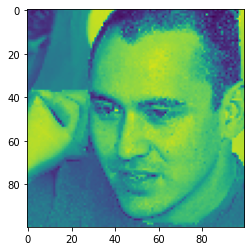

1


In [60]:
# to check the correctness of our data arrangement, we try to show the first row as an image
i = 209 # choose here the i-th image you want to show

plt.imshow(np.reshape(X[i], (image_size, image_size)))
plt.show()
print(y[i])

In [62]:
import pandas as pd

In [63]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,191,190,194,189,103,83,104,108,87,96,...,170,171,170,172,170,172,173,171,169,172
1,14,14,33,72,74,76,77,80,79,79,...,94,97,92,96,100,95,93,97,96,95
2,236,236,236,234,236,236,236,238,238,238,...,202,202,193,180,169,159,154,125,85,49
3,52,56,57,56,57,58,56,56,58,57,...,16,121,114,91,53,31,100,91,43,33
4,12,14,25,37,33,48,45,39,36,45,...,59,58,54,47,35,26,21,19,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,215,215,215,212,213,212,210,209,209,218,...,196,197,193,179,216,221,218,220,219,226
19996,181,182,182,184,182,183,182,184,181,183,...,45,44,43,46,47,49,46,46,54,46
19997,6,9,10,9,9,10,9,10,10,10,...,71,69,67,66,68,72,87,92,75,79
19998,87,86,84,85,84,83,81,78,80,80,...,248,247,247,24,42,41,36,33,27,33


In [64]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,0
...,...
19995,1
19996,1
19997,0
19998,1


In [111]:
# our final dataset composed by
# 20K rows representing the 20K images
# 10K columns representing the 100x100 pixels

df = pd.concat([pd.DataFrame(y).rename(columns={0: "target"}), pd.DataFrame(X)], axis=1)
df.head()

,target,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,191,190,194,189,103,83,104,108,87,...,170,171,170,172,170,172,173,171,169,172
1,0,14,14,33,72,74,76,77,80,79,...,94,97,92,96,100,95,93,97,96,95
2,1,236,236,236,234,236,236,236,238,238,...,202,202,193,180,169,159,154,125,85,49
3,0,52,56,57,56,57,58,56,56,58,...,16,121,114,91,53,31,100,91,43,33
4,0,12,14,25,37,33,48,45,39,36,...,59,58,54,47,35,26,21,19,17,18


In [112]:
# min = 0
# max = 255
df.iloc[:,1:3].describe()

,0,1
count,20000.000000,20000.000000
mean,98.154900,98.947250
std,72.358984,71.676902
min,0.000000,0.000000
25%,43.000000,45.000000
50%,76.000000,77.000000
75%,156.000000,156.000000
max,255.000000,255.000000


## Now let's get the tensors

In [168]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [191]:
# Model / data parameters
num_classes = 2
input_shape = (100, 100, 1)

In [196]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [197]:
x_test, x_test.shape

(array([[[ 68,  98,  95, ...,  23,  27,  24],
         [ 78,  91,  98, ...,  23,  23,  37],
         [ 64,  92, 102, ...,  25,  26,  29],
         ...,
         [129, 126,  87, ..., 173, 184, 197],
         [200, 149,  70, ..., 146, 162, 175],
         [124, 116, 107, ..., 122, 136, 137]],
 
        [[ 83,  85,  83, ...,  98, 100, 100],
         [ 84,  82,  83, ...,  97, 102,  99],
         [ 82,  84,  86, ...,  99, 100,  97],
         ...,
         [148, 158, 164, ..., 101,  86,  88],
         [178, 175, 177, ..., 231, 196, 119],
         [187, 190, 187, ..., 172, 173, 151]],
 
        [[114, 105, 101, ..., 120, 119, 119],
         [121, 113, 111, ..., 126, 123, 123],
         [121, 122, 121, ..., 124, 124, 122],
         ...,
         [188, 194, 186, ...,  39,  45,  41],
         [183, 193, 198, ...,  39,  43,  47],
         [164, 164, 163, ...,  48,  46,  45]],
 
        ...,
 
        [[191, 192, 192, ..., 192, 190, 192],
         [190, 192, 193, ..., 194, 190, 191],
         [193,

In [198]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [199]:
x_test

array([[[0.26666668, 0.38431373, 0.37254903, ..., 0.09019608,
         0.10588235, 0.09411765],
        [0.30588236, 0.35686275, 0.38431373, ..., 0.09019608,
         0.09019608, 0.14509805],
        [0.2509804 , 0.36078432, 0.4       , ..., 0.09803922,
         0.10196079, 0.11372549],
        ...,
        [0.5058824 , 0.49411765, 0.34117648, ..., 0.6784314 ,
         0.72156864, 0.77254903],
        [0.78431374, 0.58431375, 0.27450982, ..., 0.57254905,
         0.63529414, 0.6862745 ],
        [0.4862745 , 0.45490196, 0.41960785, ..., 0.47843137,
         0.53333336, 0.5372549 ]],

       [[0.3254902 , 0.33333334, 0.3254902 , ..., 0.38431373,
         0.39215687, 0.39215687],
        [0.32941177, 0.32156864, 0.3254902 , ..., 0.38039216,
         0.4       , 0.3882353 ],
        [0.32156864, 0.32941177, 0.3372549 , ..., 0.3882353 ,
         0.39215687, 0.38039216],
        ...,
        [0.5803922 , 0.61960787, 0.6431373 , ..., 0.39607844,
         0.3372549 , 0.34509805],
        [0.6

In [200]:
x_train.shape

(15000, 100, 100)

In [201]:
x_test.shape

(5000, 100, 100)

In [202]:
# Make sure images have shape (100, 100, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [203]:
x_test.shape

(5000, 100, 100, 1)

In [204]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (15000, 100, 100, 1)
15000 train samples
5000 test samples


In [ ]:
class PlotTraining(tf.keras.callbacks.Callback):
  def __init__(self, sample_rate=1, zoom=1):
    self.sample_rate = sample_rate
    self.step = 0
    self.zoom = zoom
    self.steps_per_epoch = 60000//BATCH_SIZE

  def on_train_begin(self, logs={}):
    self.batch_history = {}
    self.batch_step = []
    self.epoch_history = {}
    self.epoch_step = []
    self.fig, self.axes = plt.subplots(1, 2, figsize=(16, 7))
    plt.ioff()

  def on_batch_end(self, batch, logs={}):
    if (batch % self.sample_rate) == 0:
      self.batch_step.append(self.step)
      for k,v in logs.items():
        # do not log "batch" and "size" metrics that do not change
        # do not log training accuracy "acc"
        if k=='batch' or k=='size':# or k=='acc':
          continue
        self.batch_history.setdefault(k, []).append(v)
    self.step += 1

  def on_epoch_end(self, epoch, logs={}):
    plt.close(self.fig)
    self.axes[0].cla()
    self.axes[1].cla()
      
    self.axes[0].set_ylim(0, 1.2/self.zoom)
    self.axes[1].set_ylim(1-1/self.zoom/2, 1+0.1/self.zoom/2)
    
    self.epoch_step.append(self.step)
    for k,v in logs.items():
      # only log validation metrics
      if not k.startswith('val_'):
        continue
      self.epoch_history.setdefault(k, []).append(v)

    clear_output(wait=True)
    
    for k,v in self.batch_history.items():
      (self.axes[0 if k.endswith('loss') else 1]
           .plot(np.array(self.batch_step) / self.steps_per_epoch, v, label=k))
      
    for k,v in self.epoch_history.items():
      (self.axes[0 if k.endswith('loss') else 1]
           .plot(np.array(self.epoch_step) / self.steps_per_epoch, v,
                 label=k, linewidth=3))
      
    self.axes[0].legend()
    self.axes[1].legend()
    self.axes[0].set_xlabel('epochs')
    self.axes[1].set_xlabel('epochs')
    self.axes[0].minorticks_on()
    self.axes[0].grid(True, which='major', axis='both',
                      linestyle='-', linewidth=1)
    self.axes[0].grid(True, which='minor', axis='both',
                      linestyle=':', linewidth=0.5)
    self.axes[1].minorticks_on()
    self.axes[1].grid(True, which='major', axis='both',
                      linestyle='-', linewidth=1)
    self.axes[1].grid(True, which='minor', axis='both',
                      linestyle=':', linewidth=0.5)
    display(self.fig)

In [211]:
model = keras.Sequential(
    [
        keras.Input(shape=(100,100,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# utility callback that displays training curves
plot_training = PlotTraining(sample_rate=10, zoom=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 33856)             0         
                                                                 
 dropout_5 (Dropout)         (None, 33856)           

In [214]:
BATCH_SIZE = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, 
          batch_size=BATCH_SIZE,
          epochs=epochs,
          validation_split=0.1)

Epoch 1/10
 19/106 [====>.........................] - ETA: 43s - loss: 0.0149 - accuracy: 0.9938

KeyboardInterrupt: 

In [207]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0016497377073392272
Test accuracy: 0.9994000196456909


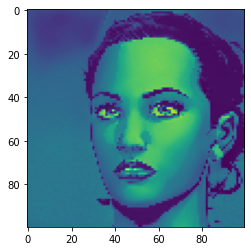

In [223]:
plt.imshow(np.resize(x_test[10], (100, 100)))

In [224]:
y_test[10]

array([1., 0.], dtype=float32)

In [226]:
x_test

array([[[[0.26666668],
         [0.38431373],
         [0.37254903],
         ...,
         [0.09019608],
         [0.10588235],
         [0.09411765]],

        [[0.30588236],
         [0.35686275],
         [0.38431373],
         ...,
         [0.09019608],
         [0.09019608],
         [0.14509805]],

        [[0.2509804 ],
         [0.36078432],
         [0.4       ],
         ...,
         [0.09803922],
         [0.10196079],
         [0.11372549]],

        ...,

        [[0.5058824 ],
         [0.49411765],
         [0.34117648],
         ...,
         [0.6784314 ],
         [0.72156864],
         [0.77254903]],

        [[0.78431374],
         [0.58431375],
         [0.27450982],
         ...,
         [0.57254905],
         [0.63529414],
         [0.6862745 ]],

        [[0.4862745 ],
         [0.45490196],
         [0.41960785],
         ...,
         [0.47843137],
         [0.53333336],
         [0.5372549 ]]],


       [[[0.3254902 ],
         [0.33333334],
         [0.32

In [233]:
predictions = model.predict(x_test)

In [234]:
y_hat = np.argmax(predictions, axis=1)

In [235]:
y_hat

array([1, 1, 1, ..., 1, 0, 0])

In [237]:
target = np.argmax(y_test, axis=1)
target

array([1, 1, 1, ..., 1, 0, 0])

In [238]:
mistakes = []

for i in range(len(target)):
    if y_hat[i] != target[i]:
        mistakes.append(i)

mistakes

[163,
 238,
 530,
 584,
 626,
 704,
 776,
 1172,
 1219,
 1534,
 1559,
 1576,
 1808,
 1809,
 1968,
 2611,
 2654,
 2993,
 3059,
 3244,
 3428,
 3535,
 3739,
 3786,
 3961,
 4052,
 4128,
 4132,
 4325,
 4452,
 4479,
 4512,
 4541,
 4565,
 4575,
 4709,
 4804,
 4902]

In [239]:
len(mistakes)

38

In [240]:
len(target)

5000

In [242]:
1 - (len(mistakes) / len(target))

0.9924

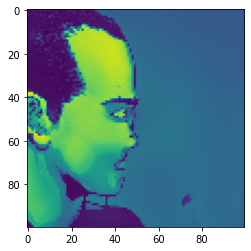

In [243]:
plt.imshow(np.resize(x_test[163], (100, 100)))

In [244]:
target[163]

0